In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv('boxoffice.csv')

In [3]:
df.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,The Avengers,6026491,1274885664,Warner Bros.,163620146,253,174687337,R,Animation,16
1,Titanic,169411543,1132871091,Disney,85549990,122,103948486,G,Action,103
2,Jurassic Park,107836098,583329845,Sony,55681429,3826,122104991,NC-17,Horror,89
3,Avatar,51433697,1225323391,Disney,109775324,3868,46431596,G,Horror,85
4,The Lion King,142791649,604140729,Warner Bros.,59476800,2934,203513696,R,Comedy,158


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   int64 
 2   world_revenue     2694 non-null   int64 
 3   distributor       2694 non-null   object
 4   opening_revenue   2694 non-null   int64 
 5   opening_theaters  2694 non-null   int64 
 6   budget            2694 non-null   int64 
 7   MPAA              2694 non-null   object
 8   genres            2694 non-null   object
 9   release_days      2694 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 210.6+ KB


In [5]:
df.describe()

,domestic_revenue,world_revenue,opening_revenue,opening_theaters,budget,release_days
count,2.694000e+03,2.694000e+03,2.694000e+03,2694.000000,2.694000e+03,2694.000000
mean,1.508539e+08,7.719177e+08,9.971321e+07,2263.039347,1.537996e+08,90.897550
std,8.579997e+07,4.284414e+08,5.721762e+07,1298.559140,8.557624e+07,50.894041
min,8.277650e+05,3.261301e+06,1.385690e+05,10.000000,5.197977e+06,1.000000
25%,7.673272e+07,3.991135e+08,5.033848e+07,1161.000000,7.861876e+07,47.000000
50%,1.525725e+08,7.665551e+08,9.981418e+07,2271.500000,1.562567e+08,91.000000
75%,2.247314e+08,1.143920e+09,1.489805e+08,3392.250000,2.274832e+08,135.000000
max,2.998107e+08,1.499310e+09,1.999336e+08,4499.000000,2.998597e+08,179.000000


In [6]:
df.isnull().sum()

title               0
domestic_revenue    0
world_revenue       0
distributor         0
opening_revenue     0
opening_theaters    0
budget              0
MPAA                0
genres              0
release_days        0
dtype: int64

In [7]:
#EDA

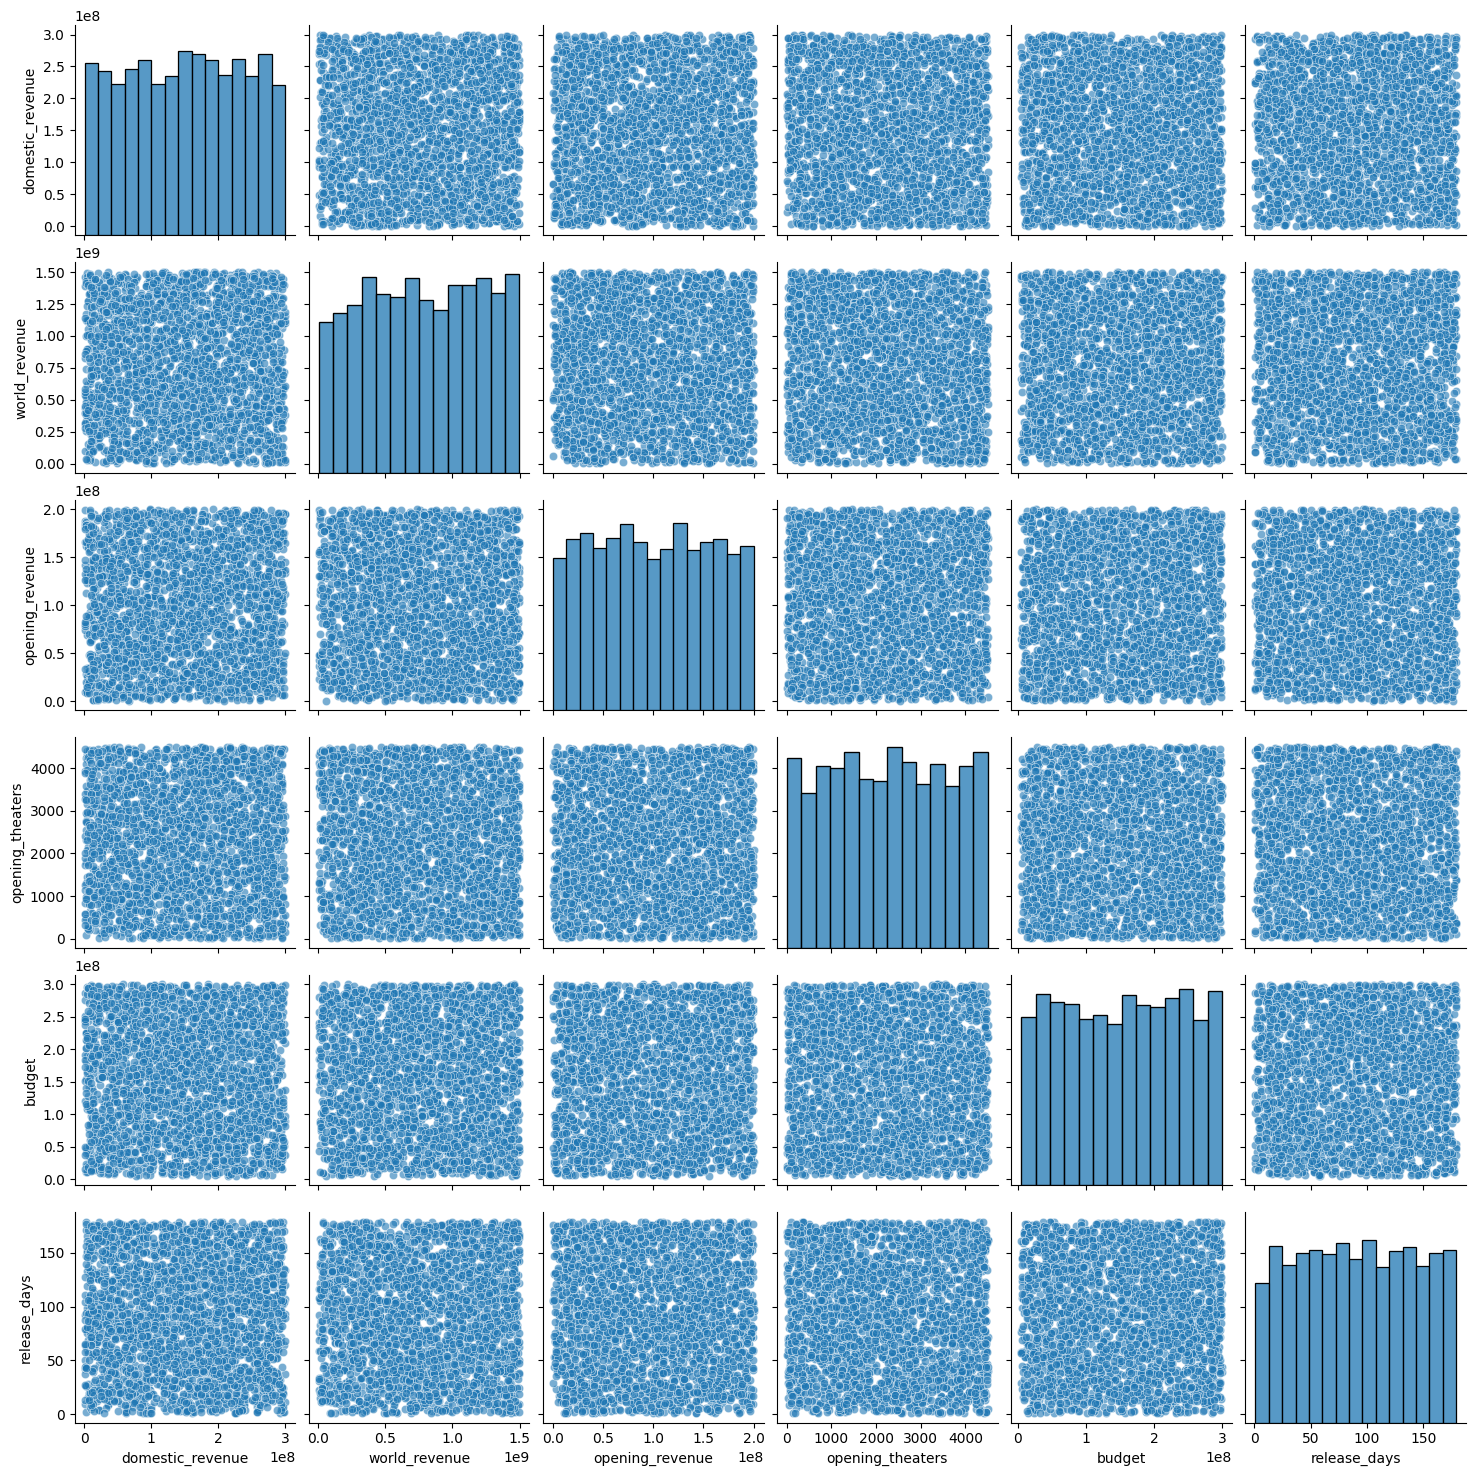

In [8]:
sns.pairplot(df, kind = "scatter", plot_kws = {"alpha" : 0.6})

In [9]:
# I don't see any correlation here at all..
# Let's try and find something that we can go on...
# I'm gonna drop the world_revenue and opening_revenue columns, since I only want to predict the domestic revenue

In [10]:
df.drop(['world_revenue' ,'opening_revenue'], axis=1, inplace=True)

In [11]:
df.head()

,title,domestic_revenue,distributor,opening_theaters,budget,MPAA,genres,release_days
0,The Avengers,6026491,Warner Bros.,253,174687337,R,Animation,16
1,Titanic,169411543,Disney,122,103948486,G,Action,103
2,Jurassic Park,107836098,Sony,3826,122104991,NC-17,Horror,89
3,Avatar,51433697,Disney,3868,46431596,G,Horror,85
4,The Lion King,142791649,Warner Bros.,2934,203513696,R,Comedy,158


In [12]:
# Firstly, let's start with finding out MPAA counts

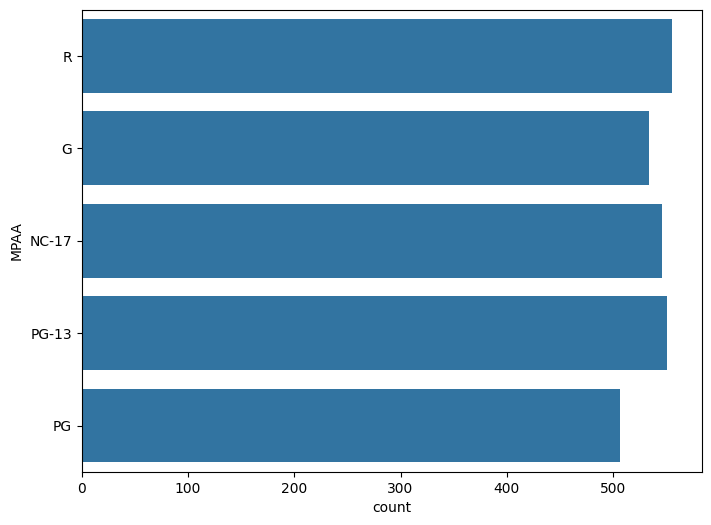

In [13]:
plt.figure(figsize = (8,6))
sns.countplot(df['MPAA'])
plt.show()

In [14]:
# Maybe there's some correlation between the domestic revenue and the movie MPAA
# Now let's isolate the columns and try to find any correlation at all between them

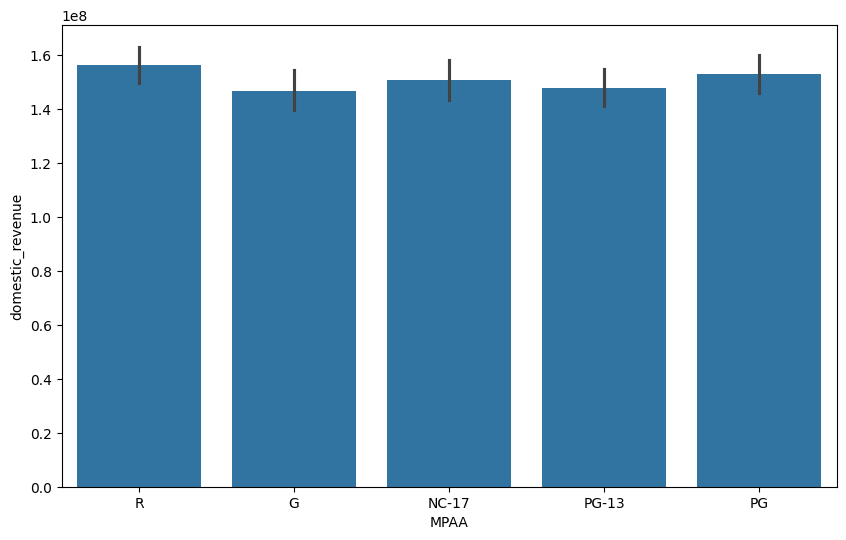

In [15]:
plt.figure(figsize= (10,6))
sns.barplot(x = df['MPAA'], y = df['domestic_revenue'])
plt.show()

In [16]:
# The R-rated movies generated the most amount of domestic revenue, but that is not expected since most of the movies in the dataset are R-rated
# let's find the mean

In [17]:
df.groupby('MPAA')['domestic_revenue'].mean()

MPAA
G        1.465288e+08
NC-17    1.507193e+08
PG       1.529123e+08
PG-13    1.477556e+08
R        1.563334e+08
Name: domestic_revenue, dtype: float64

In [18]:
# R-rated and PG movies generate the highest domestic revenue

In [19]:
# I've looked up how to tackle this dataset and i've realised that the model XGB(Extreme Gradient Boosting) needs to be used, not linear regression...obviously since there is no linear correlation at all between the features and the label.
# I haven't reached XGB yet 
# In this model, I'm gonna use linear regression first then i'm gonna use XGB on the same dataset
# I'm hoping I can learn it while just simply implementing it 
# The math around XGB is alot more complex than linear regression
# Yea

In [20]:
from sklearn.model_selection import train_test_split as tts

In [21]:
X = df['domestic_revenue']
y = df.drop(['title', 'domestic_revenue', 'MPAA', 'distributor', 'genres'],axis=1)

In [22]:
X_train, X_test, y_train, y_test = tts(X, y ,test_size = 0.2, random_state = 30)

In [23]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [24]:
# Standardising the data for fast training

In [25]:
scaler = StandardScaler()

In [26]:
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [27]:
X_train

,domestic_revenue
0,-0.242944
1,-1.041307
2,0.105545
3,0.765486
4,1.194576
...,...
2150,-1.050818
2151,0.370963
2152,-0.641048
2153,-1.384258


In [28]:
X_test

,domestic_revenue
0,0.058386
1,1.340648
2,0.504259
3,-0.645572
4,0.172456
...,...
534,0.355247
535,-0.863689
536,1.506679
537,0.251041


In [29]:
y_train

,opening_theaters,budget,release_days
2001,1181,234826053,26
1605,1261,150352029,127
975,2960,238138494,2
1889,888,114382214,136
1715,683,238713021,78
...,...,...,...
919,1993,160406913,73
1164,3286,224055226,32
500,2802,81089457,21
421,1373,202399409,102


In [30]:
y_test

,opening_theaters,budget,release_days
1451,3884,76134585,50
2128,1898,169356074,166
932,1207,92973170,176
2054,647,33090992,130
1362,2933,105623828,170
...,...,...,...
2176,3103,240861172,135
536,2881,5235121,76
1385,3181,126738719,70
1956,3661,91550128,46


In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

In [34]:
model.coef_

array([[-1.63453114e+01],
       [-2.69569884e+06],
       [ 7.70696313e-02]])

In [35]:
model.intercept_

array([2.27850673e+03, 1.56272184e+08, 9.09712297e+01])

In [36]:
predictions = model.predict(X_test)

In [37]:
predictions = pd.DataFrame(predictions)

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2 = r2_score(y_test, predictions)

In [40]:
r2

-0.009739552288764738

In [41]:
# The r2 score is absolutely horrific.
# Linear Regression is clearly not the way to go
# So i'll use XGB

In [42]:
!pip install xgboost

In [43]:
from xgboost import XGBRegressor

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   int64 
 2   distributor       2694 non-null   object
 3   opening_theaters  2694 non-null   int64 
 4   budget            2694 non-null   int64 
 5   MPAA              2694 non-null   object
 6   genres            2694 non-null   object
 7   release_days      2694 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 168.5+ KB


In [45]:
df.head()

,title,domestic_revenue,distributor,opening_theaters,budget,MPAA,genres,release_days
0,The Avengers,6026491,Warner Bros.,253,174687337,R,Animation,16
1,Titanic,169411543,Disney,122,103948486,G,Action,103
2,Jurassic Park,107836098,Sony,3826,122104991,NC-17,Horror,89
3,Avatar,51433697,Disney,3868,46431596,G,Horror,85
4,The Lion King,142791649,Warner Bros.,2934,203513696,R,Comedy,158


In [46]:
features = df.drop(['title', 'domestic_revenue'], axis=1)
target = df['domestic_revenue']

In [47]:
X_train2 , X_test2 , y_train2, y_test2 = tts(features, target, test_size = 0.35 ,random_state = 30)

In [84]:
X_train2 = pd.DataFrame(X_train2)
X_test2 = pd.DataFrame(X_test2)

In [85]:
#y_train2 = y_train2.values.ravel()
#y_test2 = y_test2.values.ravel()

In [86]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in X_train2.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train2[col] = le.fit_transform(X_train2[col])
    X_test2[col] = le.transform(X_test2[col])


In [87]:
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [88]:
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((1751, 6), (943, 6), (1751,), (943,))

In [89]:
xgb = XGBRegressor(
    objective='reg:squarederror',  # Regression objective
    n_estimators=100,  # Number of boosting rounds (trees)
    learning_rate=0.1,  # Step size shrinkage (default = 0.1)
    max_depth=150,  # Depth of trees (default = 6)
    subsample=0.8,  # Fraction of samples used for training each tree
    colsample_bytree=0.8,  # Fraction of features used for each tree
    random_state=42
)

In [90]:
xgb.fit(X_train2, y_train2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=150, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [98]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error as mae

In [100]:
train_preds = xgb.predict(X_train2)
print('Training Error : ', mae(y_train2, train_preds))

val_preds = xgb.predict(X_test2)
print('Validation Error : ', mae(y_test2, val_preds))
print()

Training Error :  467583.71875
Validation Error :  75870272.0



In [101]:
# well I tried but wow...
# the code is really messy i wanna start from scratch